# Intro to machine learning

### Introduction

In the last lesson, we saw how Jon learned how to change the angle of his shot to determine the distance his basketball goes.

<img src="basketball-shooting.jpg">

We saw a five step process.

**1. Take a guess** as to how the angle effects distance

```python
def distance_guess(angle):
    return (12 + 5*angle)
```
**2. Observe the actual distances** that come from taking basketball shots with different angles

| angle        | actual distance           
| ------------- |:-------------:| 
|    .30        | 8 feet | 
|    .50        | 11 feet | 
|    .70        | 17 feet | 

**3. Compare** the **actual** distances **to those predicted** by the formula 

```python
distance_guess(.30) # 13.5
distance_guess(.50) # 14.4
distance_guess(.70) # 15.5
```

**4. Update our function** to better match the data

**5. Predict new** distances that will come from shots with new angles


### The machine learning process

**1. Back to plotting data**

The first thing to do is to realize that our chart of angles and distances above can be plotted in a graph.

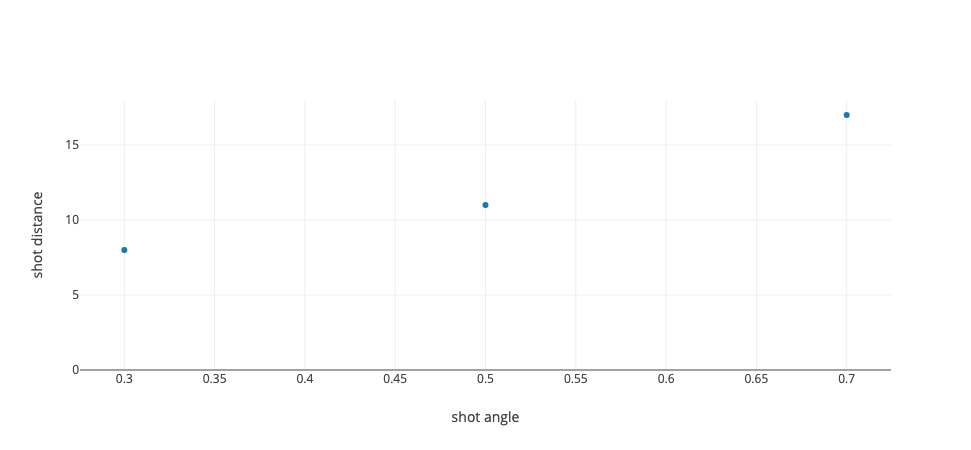

In [18]:
from graph import trace_values, plot
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
plot([trace_values([.30, .50, .70], [8, 11, 17])], layout)

So in the above graph, shot angle is along the x axis, and shot distance is on the y axis.  So that first blue dot on the left indicates that a shot with an angle of .30 had a distance of 8 feet.

**2. Defining a Model**

Now the next thing to do is to visualize the initial guess.  As we know, the formula that our player used to estimate how an angle effects a shot is called a **model**.

In [19]:
def distance_guess(angle):
    return (12 + 5*angle)

Believe it or not, this is a valid machine learning model.

It's a simple function represents an understanding as to how angle relates to distance.  The distance is 5 times the angle plus 12.  So then this model provides us with a prediction for each shot angle, which we can see by passing different inputs into our function.

In [26]:
distance_guess(.10) # 12.5
distance_guess(.30) # 13.5
distance_guess(.60) # 15.0

15.0

And we can just create a list of input data, which we can then use `map` to find the corresponding predictions with our machine learning model, `distance_guess`. 

In [32]:
inputs = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
predictions = list(map(lambda x: distance_guess(x), inputs))
predictions

[12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]

So now we have range of input data as well as the related model predictions.  We can plot these predictions along the actual shot data.

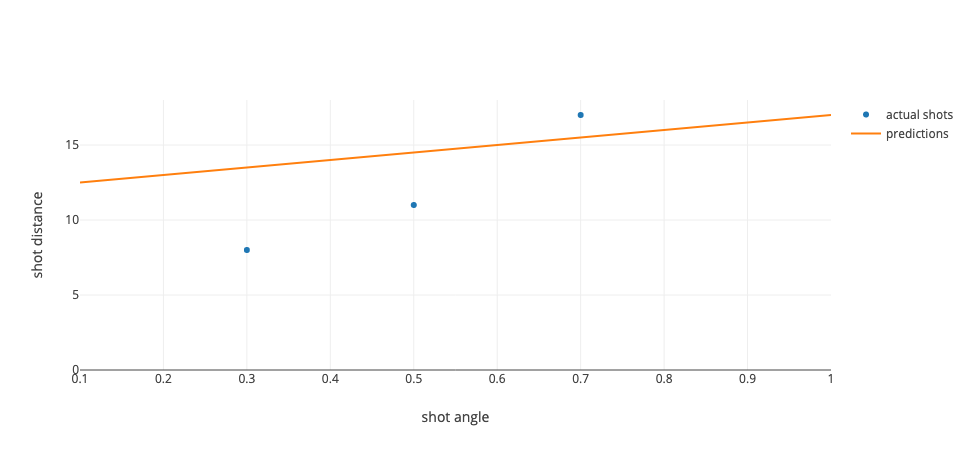

In [40]:
from graph import trace_values, plot
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
actual_trace = trace_values([.30, .50, .70], [8, 11, 17], name = 'actual shots')
predictions_trace = trace_values(inputs, predictions, 'lines', name = 'predictions')
plot([actual_trace, predictions_trace], layout)

### 3. Comparing the data

So from the graph above, we can begin to see how well our model -- represented by the orange line -- predicts the actual data (displayed by the blue dots).  Let's make this more explicit.

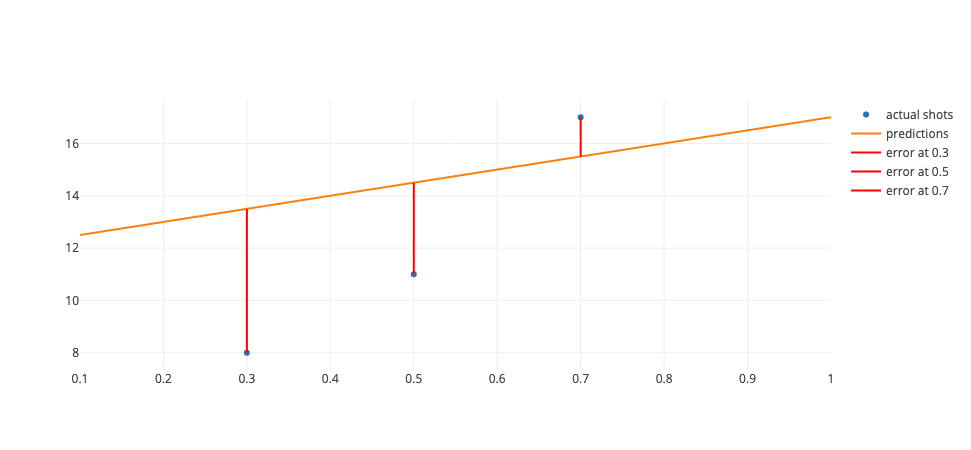

In [44]:
from linear_equations import build_regression_line
from graph import m_b_trace, plot, m_b_data, trace_values
from error import error_line_traces

from graph import trace_values, plot
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
observed_shot_angles = [.30, .50, .70]
observed_distances = [8, 11, 17]
actual_trace = trace_values(observed_shot_angles, observed_distances, name = 'actual shots')
predictions_trace = trace_values(inputs, predictions, 'lines', name = 'predictions')

error_traces = error_line_traces(observed_shot_angles, observed_distances, 5, 12)
plot([actual_trace, predictions_trace] + error_traces)

In the graph above, each red line represents the distance between what our model predicts for a given angle, and what we actually saw.  So the first red shows difference that the model predicts of being the distance -- 13.5 feet-- and what the actual shot distance was with an angle of .3, 8 feet.  We believe that models are more predictive when they come closer to approximating the already existing data, so we **fit** the model by changing our model, and thus the line so that it comes closer to the data.

In machine learning we may have thousands or even millions of datapoints that we want our model to approximate, so we can't just eyeball the model and the data to see how accurate of a model we have.  Instead at each datapoint, we calculate the difference between the actual data and what our model expects.

> error = actual - expected

In [ ]:
first_error = (8 - 13.5) = -5.5
second_error = (11 - 14.5) = -3.5
third_error = (17 - 15.5) = 2.5

We want to represent the total error, by adding up -5.5 + -3.5 + 2.5, but you can see adding -5.5 + -3.5 gives us -9 but adding the error at the third point, 2 to -9 gives us an error of -7.  So having the numbers in different signs is having our errors cancel each other out.

We modify each of the errors to take the same by squaring each of the errors.  After all:
    
$1^2 = 1* 1 =  1$  

and

$-1^2 = -1*-1 = 1$

So let's square each of the errors above and then add up these squared errors.

$(8-13.5)^2 + (11-14.5)^2 + (17-15.5)^2 = (-5.5)^2 + (-3.5)^2 + 2.5^2 = 48.75$

We call this number the sum of squared errors (SSE).  So SSE = 48.75 for the model above.

### Finding a better line

So we can now use this one metric to assess the accuracy of our model, and to try a number of different models and see which one does the best.  That's precisely what we do with machine learning.  This is what happens when we fit a *model*.  We change our model so that we find a model that produces a lower SSE (or some other metric we may choose).   

For example we started with the initial model of 
```python
def distance_guess(angle):
    return (12 + 5*angle)
```
but we can change this to be 

```python
def distance_guess(angle):
    return (12 + 4*angle)
```
or 

```python
def distance_guess(angle):
    return (12 + 3*angle)
```

And then plot the how well each of the match up to our data, and then choose the line that fits our data the best.  This line is called "the best fit line". 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



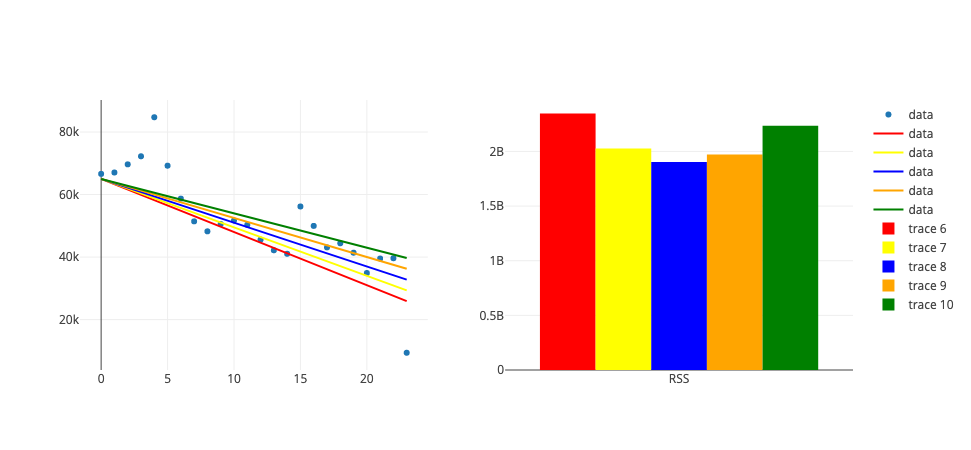

In [2]:
from graph import model_trace, trace_rss, pair_colors, plot_side_by_side
from graph import trace_values
b= 65000

import json
with open('months-since-revenues.json', 'r') as revenue_file:
    monthly_revenues = json.load(revenue_file)

month_numbers = list(map(lambda monthly_revenue: monthly_revenue['month_number'], monthly_revenues))
revenues = list(map(lambda monthly_revenue: monthly_revenue['revenue'], monthly_revenues))


m_values = list(range(-1700, -1000, 150))
rss_traces = []
model_traces = []

actual_trace = trace_values(x_values = month_numbers, y_values = revenues)

for m in m_values:
    rss_trace = trace_rss(m, b, month_numbers, revenues)
    rss_traces.append(rss_trace)
    built_model_trace = model_trace(m, b, month_numbers, revenues)
    model_traces.append(built_model_trace)
    
pair_colors(model_traces, rss_traces)
plot_side_by_side([actual_trace] + model_traces, rss_traces)

### Predict new data

Once we find the model that minimizes our SSE, we can use that model to predict new datapoints.  So this is the model that best fits our data.

```python
def distance_guess(angle):
    return (12 + 5*angle)
```

And so because we expect future observations to influenced by the angle just like previous ones were, because this model fits our past data well, we expect this to fit future data as well. 

### Summary

In this lesson, we saw an overview of the process of machine learning.  What we saw is that just like with human learning, machine learning starts with an initial guess of using some information to predict other -- here using angle information to predict distance.  Then it compares that guess, which we call a model with actual data, and updates that model to better match the data.

The way that it can do this is by calculating the difference the actual data, and what the model would predict.  So given actual shots of different angles and their distances, how does that differ from the model's prediction of distances for shots of those angles.      



| angle        | actual distance | predicted distance           
| ------------- |:-------------:| -------------
|    .30        | 8 feet |     13.5 feet
|    .50        | 11 feet |   14.5
|    .70        | 17 feet | 15.5


Then we modify the numbers to try different numbers, and choose the model that best fits our data.

```python
def distance_guess(angle):
    return (12 + 5*angle)
```

In the next lesson, we'll use a machine learning library to create a machine learning model.